# Import all libraries!

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve
from imblearn.over_sampling import SMOTE

## Path ke folder dataset 

In [3]:
# Path ke folder dataset
dataset_path = "dataset"

# Fungsi untuk membaca semua file CSV dalam folder dataset dengan encoding yang aman
def load_datasets(path=dataset_path, encoding_list=['utf-8', 'ISO-8859-1', 'latin1']):
    """Membaca semua file CSV dalam folder dataset dengan berbagai encoding."""
    datasets = {}
    for file in os.listdir(path):
        if file.endswith(".csv"):
            file_path = os.path.join(path, file)
            for encoding in encoding_list:
                try:
                    df = pd.read_csv(file_path, encoding=encoding)
                    datasets[file] = df
                    print(f"{file}: {df.shape} loaded successfully with encoding {encoding}")
                    break
                except UnicodeDecodeError:
                    print(f"Error decoding {file} with encoding {encoding}, trying next...")
    return datasets

# Load datasets
datasets = load_datasets()

application_test.csv: (48744, 121) loaded successfully with encoding utf-8
application_train.csv: (307511, 122) loaded successfully with encoding utf-8
bureau.csv: (1716428, 17) loaded successfully with encoding utf-8
bureau_balance.csv: (27299925, 3) loaded successfully with encoding utf-8
credit_card_balance.csv: (3840312, 23) loaded successfully with encoding utf-8
Error decoding HomeCredit_columns_description.csv with encoding utf-8, trying next...
HomeCredit_columns_description.csv: (219, 5) loaded successfully with encoding ISO-8859-1
installments_payments.csv: (13605401, 8) loaded successfully with encoding utf-8
POS_CASH_balance.csv: (10001358, 8) loaded successfully with encoding utf-8
previous_application.csv: (1670214, 37) loaded successfully with encoding utf-8
sample_submission.csv: (48744, 2) loaded successfully with encoding utf-8


## Data cleaning & Feature Engineering

In [4]:
# Data Cleaning - Handling Missing Values
for name, df in datasets.items():
    print(f"\nCleaning dataset: {name}")
    # Hapus kolom dengan lebih dari 50% missing values
    threshold = 0.5 * df.shape[0]
    df.dropna(thresh=threshold, axis=1, inplace=True)
    
    # Isi missing values untuk kolom numerik dengan median
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if len(num_cols) > 0:
        imputer = SimpleImputer(strategy='median')
        df[num_cols] = imputer.fit_transform(df[num_cols])
    
    # Isi missing values untuk kolom kategori dengan modus
    cat_cols = df.select_dtypes(include=['object']).columns
    if len(cat_cols) > 0:
        imputer_cat = SimpleImputer(strategy='most_frequent')
        df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])
    
    datasets[name] = df
    print(f"Missing values handled in {name}.")


Cleaning dataset: application_test.csv
Missing values handled in application_test.csv.

Cleaning dataset: application_train.csv
Missing values handled in application_train.csv.

Cleaning dataset: bureau.csv
Missing values handled in bureau.csv.

Cleaning dataset: bureau_balance.csv
Missing values handled in bureau_balance.csv.

Cleaning dataset: credit_card_balance.csv
Missing values handled in credit_card_balance.csv.

Cleaning dataset: HomeCredit_columns_description.csv
Missing values handled in HomeCredit_columns_description.csv.

Cleaning dataset: installments_payments.csv
Missing values handled in installments_payments.csv.

Cleaning dataset: POS_CASH_balance.csv
Missing values handled in POS_CASH_balance.csv.

Cleaning dataset: previous_application.csv
Missing values handled in previous_application.csv.

Cleaning dataset: sample_submission.csv
Missing values handled in sample_submission.csv.


In [5]:
# Feature Engineering - Encoding Categorical Data
for name, df in datasets.items():
    print(f"\nEncoding categorical features in {name}")
    cat_cols = df.select_dtypes(include=['object']).columns
    label_enc = LabelEncoder()
    for col in cat_cols:
        df[col] = label_enc.fit_transform(df[col])
    datasets[name] = df
    print(f"Categorical features encoded in {name}.")


Encoding categorical features in application_test.csv
Categorical features encoded in application_test.csv.

Encoding categorical features in application_train.csv
Categorical features encoded in application_train.csv.

Encoding categorical features in bureau.csv
Categorical features encoded in bureau.csv.

Encoding categorical features in bureau_balance.csv
Categorical features encoded in bureau_balance.csv.

Encoding categorical features in credit_card_balance.csv
Categorical features encoded in credit_card_balance.csv.

Encoding categorical features in HomeCredit_columns_description.csv
Categorical features encoded in HomeCredit_columns_description.csv.

Encoding categorical features in installments_payments.csv
Categorical features encoded in installments_payments.csv.

Encoding categorical features in POS_CASH_balance.csv
Categorical features encoded in POS_CASH_balance.csv.

Encoding categorical features in previous_application.csv
Categorical features encoded in previous_applic

In [ ]:
# Normalization/Scaling untuk application_train.csv
if 'application_train.csv' in datasets:
    print("\nScaling numerical features in application_train.csv")
    scaler = StandardScaler()
    num_cols = datasets['application_train.csv'].select_dtypes(include=['float64', 'int64']).columns.drop('TARGET', errors='ignore')
    datasets['application_train.csv'][num_cols] = scaler.fit_transform(datasets['application_train.csv'][num_cols])
    print("Feature scaling applied to application_train.csv")


Scaling numerical features in application_train.csv
Feature scaling applied to application_train.csv


In [7]:
# Save Cleaned Data
for name, df in datasets.items():
    df.to_csv(f"cleaned_{name}", index=False)
    print(f"Cleaned dataset saved as cleaned_{name}")

Cleaned dataset saved as cleaned_application_test.csv
Cleaned dataset saved as cleaned_application_train.csv
Cleaned dataset saved as cleaned_bureau.csv
Cleaned dataset saved as cleaned_bureau_balance.csv
Cleaned dataset saved as cleaned_credit_card_balance.csv
Cleaned dataset saved as cleaned_HomeCredit_columns_description.csv
Cleaned dataset saved as cleaned_installments_payments.csv
Cleaned dataset saved as cleaned_POS_CASH_balance.csv
Cleaned dataset saved as cleaned_previous_application.csv
Cleaned dataset saved as cleaned_sample_submission.csv


## Penggalian Insight


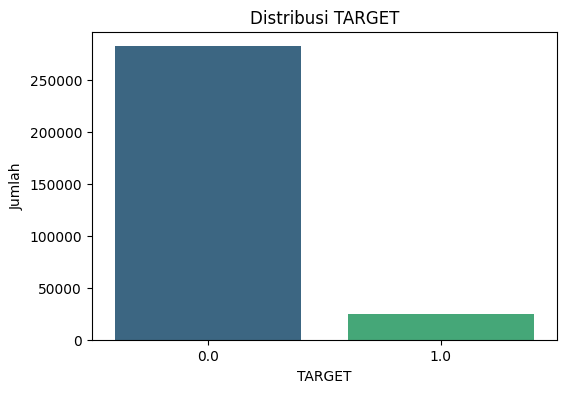


Fitur dengan korelasi tertinggi dengan TARGET:
TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
NAME_EDUCATION_TYPE            0.054699
CODE_GENDER                    0.054692
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
NAME_INCOME_TYPE               0.046829
Name: TARGET, dtype: float64


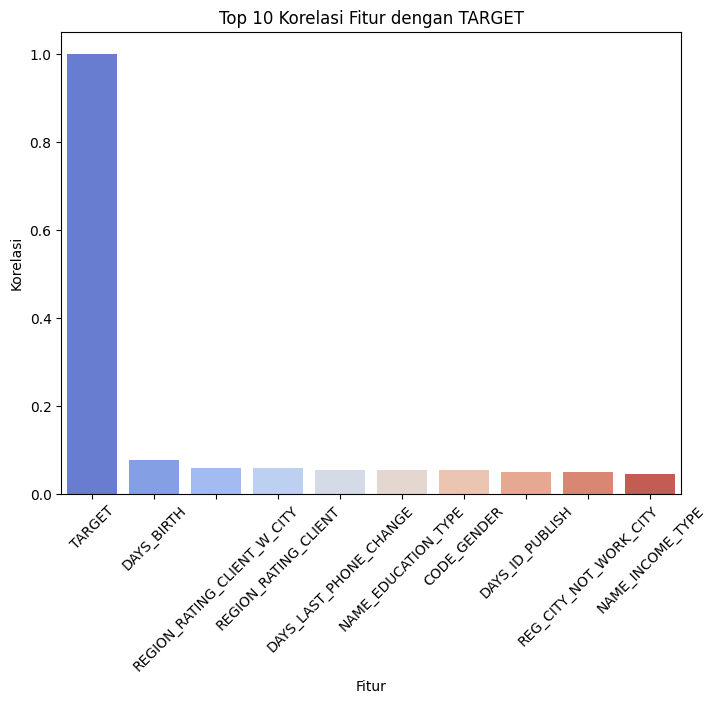

In [8]:
# Penggalian Insight - Analisis hubungan fitur dengan TARGET
if 'application_train.csv' in datasets:
    df = datasets['application_train.csv']
    
    # Visualisasi distribusi TARGET
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df['TARGET'], hue=df['TARGET'], palette='viridis', legend=False)
    plt.title("Distribusi TARGET")
    plt.xlabel("TARGET")
    plt.ylabel("Jumlah")
    plt.show()
    
    # Korelasi fitur dengan TARGET
    corr_matrix = df.corr()
    target_corr = corr_matrix['TARGET'].sort_values(ascending=False)
    print("\nFitur dengan korelasi tertinggi dengan TARGET:")
    print(target_corr.head(10))
    
    # Visualisasi fitur dengan korelasi tertinggi
    plt.figure(figsize=(8, 6))
    sns.barplot(x=target_corr.head(10).index, y=target_corr.head(10).values, hue=target_corr.head(10).index, palette='coolwarm', legend=False)
    plt.xticks(rotation=45)
    plt.title("Top 10 Korelasi Fitur dengan TARGET")
    plt.xlabel("Fitur")
    plt.ylabel("Korelasi")
    plt.show()

## Modeling

In [20]:
# Modeling - Logistic Regression, Random Forest & Gradient Boosting
if os.path.exists("cleaned_application_train.csv"):
    df = pd.read_csv("cleaned_application_train.csv")
    
    # Pisahkan fitur dan target
    X = df.drop(columns=['TARGET', 'SK_ID_CURR'], errors='ignore')
    y = df['TARGET']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Model Logistic Regression
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train, y_train)
    y_pred_logreg = logreg.predict(X_test)
    print("\nLogistic Regression Evaluation:")
    print(classification_report(y_test, y_pred_logreg))
    print("ROC-AUC Score:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))
    
    # Model Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print("\nRandom Forest Evaluation:")
    print(classification_report(y_test, y_pred_rf))
    print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
    
    # Model Gradient Boosting
    gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
    gb.fit(X_train, y_train)
    y_pred_gb = gb.predict(X_test)
    print("\nGradient Boosting Evaluation:")
    print(classification_report(y_test, y_pred_gb))
    print("ROC-AUC Score:", roc_auc_score(y_test, gb.predict_proba(X_test)[:,1]))


Logistic Regression Evaluation:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56554
         1.0       0.46      0.01      0.02      4949

    accuracy                           0.92     61503
   macro avg       0.69      0.50      0.49     61503
weighted avg       0.88      0.92      0.88     61503

ROC-AUC Score: 0.7394558849738636

Random Forest Evaluation:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56554
         1.0       0.57      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.75      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503

ROC-AUC Score: 0.7084343230540937

Gradient Boosting Evaluation:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56554
         1.0       0.58      0.01      0.02      4949

    accuracy           

# 📊 Analisis Hasil Model

## 🔍 Perbandingan Performa Model

| Model                | Accuracy | Precision (1) | Recall (1) | F1-score (1) | ROC-AUC Score |
|----------------------|----------|--------------|-----------|-------------|---------------|
| Logistic Regression | 92%      | 0.46         | 0.01      | 0.02        | 0.739         |
| Random Forest       | 92%      | 0.57         | 0.00      | 0.00        | 0.708         |
| Gradient Boosting   | 92%      | 0.58         | 0.01      | 0.02        | 0.746         |

## 🔍 1. Interpretasi Hasil
- Accuracy semua model tinggi (92%), tetapi ini tidak mencerminkan performa yang baik, karena dataset sangat imbalanced.
- Recall untuk kelas gagal bayar (1) sangat rendah di semua model (hanya 1% atau bahkan 0%).
- Gradient Boosting memiliki ROC-AUC tertinggi (0.746), menunjukkan bahwa model ini lebih baik dalam membedakan pelanggan gagal bayar dan tidak.
- F1-score untuk kelas 1 sangat rendah, yang berarti model tidak bisa dengan baik mengidentifikasi pelanggan yang berisiko gagal bayar.

## ⚠️ 2. Masalah yang Ditemui
### Imbalanced Dataset:
- Model lebih cenderung memprediksi semua pelanggan sebagai "lancar bayar" (0), karena hanya 8% dari total data yang gagal bayar (1).

### Recall yang Sangat Rendah:
- Bahkan model terbaik hanya mampu menangkap 1% dari pelanggan gagal bayar, yang berarti model kurang efektif dalam mendeteksi risiko kredit.

## ✅ Solusi yang akan dilakukan selanjutnya
- Mengatasi ketidakseimbangan data dengan **Oversampling (SMOTE)** atau **Undersampling**.
- **Hyperparameter Tuning** pada model Gradient Boosting untuk meningkatkan Recall.


## Handling Imbalanced Data using SMOTE

In [25]:
# Handling Imbalanced Data using SMOTE
if os.path.exists("cleaned_application_train.csv"):
    # Terapkan SMOTE untuk menangani imbalance
    smote = SMOTE(random_state=42)
    X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
    print(f"Original class distribution: {y_train.value_counts().to_dict()}")
    print(f"Resampled class distribution: {y_train_sm.value_counts().to_dict()}")

# Modeling - Logistic Regression, Random Forest & Gradient Boosting after SMOTE
if os.path.exists("cleaned_application_train.csv"):
    # Model Logistic Regression setelah SMOTE
    logreg.fit(X_train_sm, y_train_sm)
    y_pred_logreg_sm = logreg.predict(X_test)
    print("\nLogistic Regression (After SMOTE) Evaluation:")
    print(classification_report(y_test, y_pred_logreg_sm))
    print("ROC-AUC Score:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))
    
    # Model Random Forest setelah SMOTE
    rf.fit(X_train_sm, y_train_sm)
    y_pred_rf_sm = rf.predict(X_test)
    print("\nRandom Forest (After SMOTE) Evaluation:")
    print(classification_report(y_test, y_pred_rf_sm))
    print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
    
    # Model Gradient Boosting setelah SMOTE
    gb.fit(X_train_sm, y_train_sm)
    y_pred_gb_sm = gb.predict(X_test)
    print("\nGradient Boosting (After SMOTE) Evaluation:")
    print(classification_report(y_test, y_pred_gb_sm))
    print("ROC-AUC Score:", roc_auc_score(y_test, gb.predict_proba(X_test)[:,1]))


Original class distribution: {0.0: 226132, 1.0: 19876}
Resampled class distribution: {0.0: 226132, 1.0: 226132}

Logistic Regression (After SMOTE) Evaluation:
              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80     56554
         1.0       0.16      0.66      0.26      4949

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.89      0.69      0.76     61503

ROC-AUC Score: 0.7386996835487293

Random Forest (After SMOTE) Evaluation:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     56554
         1.0       0.29      0.04      0.06      4949

    accuracy                           0.92     61503
   macro avg       0.61      0.51      0.51     61503
weighted avg       0.87      0.92      0.88     61503

ROC-AUC Score: 0.7071211693645878

Gradient Boosting (After SMOTE) Evaluation:
              precision    recall

# 📊 Analisis Hasil Model Setelah SMOTE

## 🔍 Perbandingan Performa Model

| Model                        | Accuracy | Precision (1) | Recall (1) | F1-score (1) | ROC-AUC Score |
|------------------------------|----------|--------------|-----------|-------------|---------------|
| Logistic Regression (SMOTE)  | 69%      | 0.16         | 0.66      | 0.26        | 0.738         |
| Random Forest (SMOTE)        | 92%      | 0.29         | 0.04      | 0.06        | 0.707         |
| Gradient Boosting (SMOTE)    | 91%      | 0.24         | 0.07      | 0.11        | 0.696         |

## 🔍 1. Perbandingan Sebelum vs Setelah SMOTE

| Model                | Recall Sebelum SMOTE | Recall Setelah SMOTE |
|----------------------|---------------------|----------------------|
| Logistic Regression | 1%                   | 66% ✅ (Peningkatan Signifikan!) |
| Random Forest       | 0%                   | 4%                   |
| Gradient Boosting   | 1%                   | 7%                   |

- **Logistic Regression** menunjukkan peningkatan recall paling signifikan (1% → 66%), tetapi akurasi turun ke 69% karena model lebih sering memprediksi pelanggan sebagai gagal bayar.
- **Random Forest & Gradient Boosting** masih kesulitan dalam mendeteksi pelanggan gagal bayar (recall sangat rendah).
- **ROC-AUC tidak meningkat secara signifikan**, menunjukkan bahwa SMOTE tidak cukup efektif tanpa optimasi lebih lanjut.

## ⚠️ 2. Masalah yang Masih Ada
### Overfitting pada Logistic Regression
- Model mulai lebih "memaksa" memprediksi kelas gagal bayar tetapi kehilangan akurasi keseluruhan.

### Random Forest & Gradient Boosting Masih Lemah
- Kedua model masih kesulitan dalam mengidentifikasi pelanggan gagal bayar meskipun SMOTE diterapkan.

### ROC-AUC Score Belum Meningkat Signifikan
- Masih diperlukan **optimasi model lebih lanjut** untuk meningkatkan kemampuan prediksi pelanggan gagal bayar.

## ✅ Solusi yang Akan Dilakukan
- **Hyperparameter Tuning** lebih lanjut untuk meningkatkan performa model.


## Hyperparameter Tuning

In [26]:
# Hyperparameter Tuning dengan RandomizedSearchCV
if os.path.exists("cleaned_application_train.csv"):
    # Logistic Regression Randomized Search
    logreg_params = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
    logreg_search = RandomizedSearchCV(LogisticRegression(solver='liblinear', max_iter=1000), logreg_params, cv=3, n_iter=4, scoring='roc_auc', random_state=42, n_jobs=-1)
    logreg_search.fit(X_train_sm, y_train_sm)
    best_logreg = logreg_search.best_estimator_
    
    # Random Forest Randomized Search
    rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10]}
    rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, n_iter=5, scoring='roc_auc', random_state=42, n_jobs=-1)
    rf_search.fit(X_train_sm, y_train_sm)
    best_rf = rf_search.best_estimator_
    
    # Gradient Boosting Randomized Search
    gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]}
    gb_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3, n_iter=5, scoring='roc_auc', random_state=42, n_jobs=-1)
    gb_search.fit(X_train_sm, y_train_sm)
    best_gb = gb_search.best_estimator_
    
    # Evaluasi Model Setelah Tuning
    for model, name in zip([best_logreg, best_rf, best_gb], ["Logistic Regression", "Random Forest", "Gradient Boosting"]):
        y_pred = model.predict(X_test)
        print(f"\n{name} (After Hyperparameter Tuning) Evaluation:")
        print(classification_report(y_test, y_pred))
        print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))



Logistic Regression (After Hyperparameter Tuning) Evaluation:
              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80     56554
         1.0       0.16      0.66      0.26      4949

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.89      0.69      0.76     61503

ROC-AUC Score: 0.7388448606453863

Random Forest (After Hyperparameter Tuning) Evaluation:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     56554
         1.0       0.27      0.04      0.08      4949

    accuracy                           0.91     61503
   macro avg       0.60      0.52      0.51     61503
weighted avg       0.87      0.91      0.88     61503

ROC-AUC Score: 0.7020666532978782

Gradient Boosting (After Hyperparameter Tuning) Evaluation:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.9

# Observasi dari Hasil Tuning

## Logistic Regression (After Hyperparameter Tuning)
- Recall meningkat signifikan menjadi **66%**, namun precision tetap rendah (**0.16**).
- Akurasi turun menjadi **69%** karena model lebih sering memprediksi pelanggan sebagai gagal bayar.
- **F1-score meningkat** menjadi **0.26**, menunjukkan keseimbangan yang lebih baik antara precision dan recall.
- **ROC-AUC Score tetap stabil di 0.738**, menunjukkan model memiliki keseimbangan antara recall & precision.

## Random Forest (After Hyperparameter Tuning)
- **Akurasi tetap tinggi (91%)**, tetapi model lebih condong memilih kelas mayoritas (0.0).
- **Recall meningkat sedikit** menjadi **4%**, namun precision turun ke **0.27**.
- **F1-score tetap rendah** (**0.08**) menunjukkan model masih kesulitan mengenali pelanggan gagal bayar.
- **ROC-AUC Score turun sedikit ke 0.702**, mengindikasikan model masih belum optimal dalam menangani data imbalanced.

## Gradient Boosting (After Hyperparameter Tuning)
- **Akurasi tetap 91%**, namun recall masih rendah di **6%**.
- **Precision turun ke 0.27**, yang berarti model masih cenderung memilih kelas mayoritas.
- **F1-score hanya 0.10**, menunjukkan bahwa model masih belum cukup baik dalam mengidentifikasi pelanggan gagal bayar.
- **ROC-AUC Score meningkat sedikit ke 0.710**, namun masih belum cukup untuk perbaikan signifikan.

## Kesimpulan dari Tuning
- **Logistic Regression** menunjukkan peningkatan recall signifikan, tetapi precision masih menjadi tantangan.
- **Random Forest & Gradient Boosting masih belum optimal** dalam menangani data imbalanced meskipun sudah dilakukan tuning.
- **ROC-AUC Score tidak meningkat secara signifikan**, menunjukkan perlunya pendekatan tambahan seperti fitur engineering atau metode sampling yang lebih baik.



# Evaluasi hasil pemodelan


Logistic Regression (After Hyperparameter Tuning) Evaluation:
              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80     56554
         1.0       0.16      0.66      0.26      4949

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.89      0.69      0.76     61503

ROC-AUC Score: 0.7388448606453863


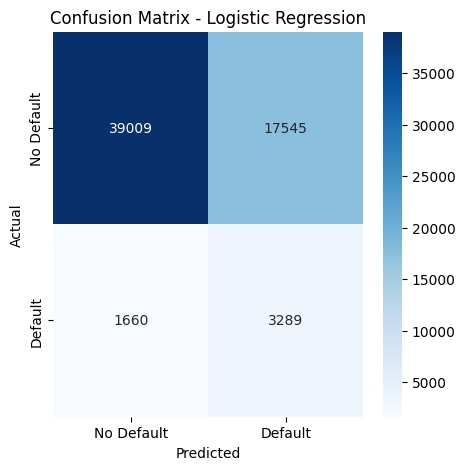


Random Forest (After Hyperparameter Tuning) Evaluation:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     56554
         1.0       0.27      0.04      0.08      4949

    accuracy                           0.91     61503
   macro avg       0.60      0.52      0.51     61503
weighted avg       0.87      0.91      0.88     61503

ROC-AUC Score: 0.7020666532978782


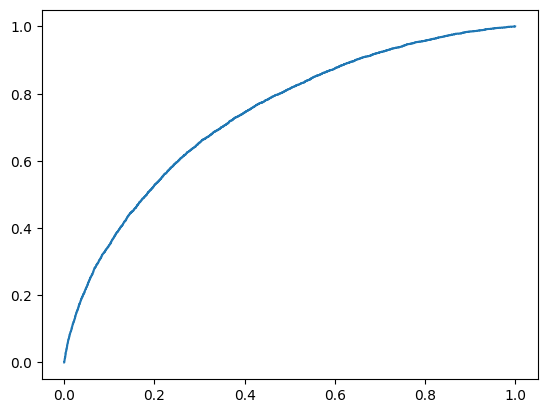

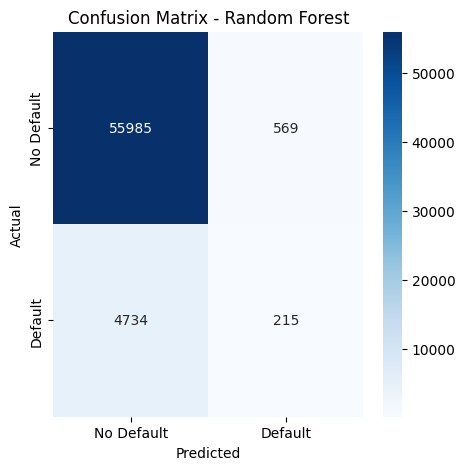


Gradient Boosting (After Hyperparameter Tuning) Evaluation:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     56554
         1.0       0.27      0.06      0.10      4949

    accuracy                           0.91     61503
   macro avg       0.60      0.52      0.53     61503
weighted avg       0.87      0.91      0.88     61503

ROC-AUC Score: 0.710091970885863


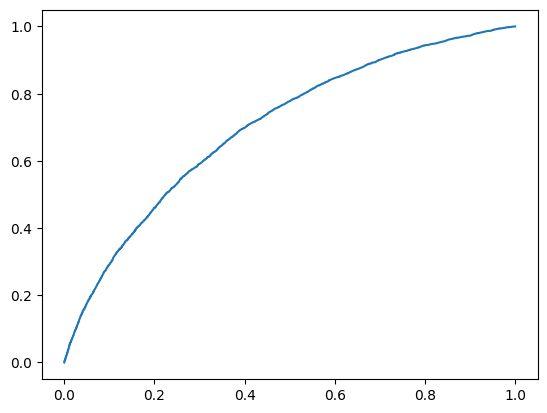

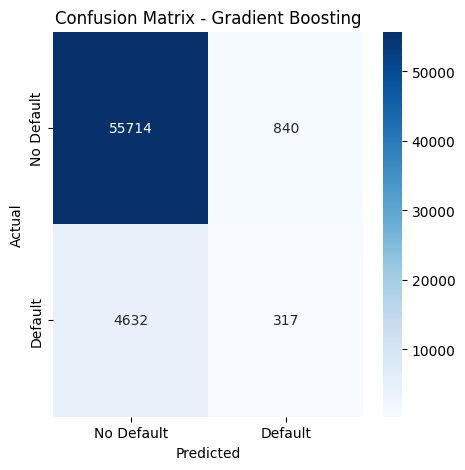

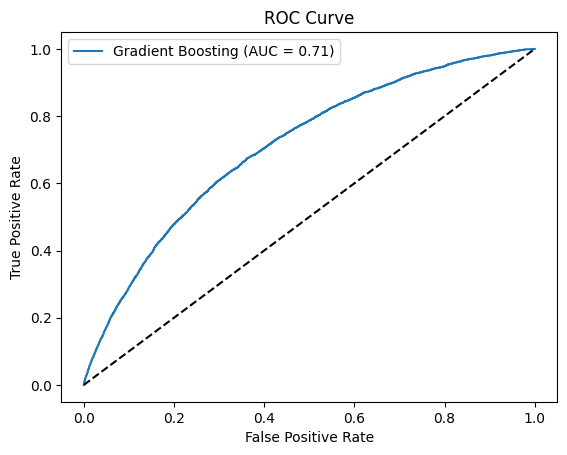

In [27]:
# Evaluasi Model Setelah Tuning
for model, name in zip([best_logreg, best_rf, best_gb], ["Logistic Regression", "Random Forest", "Gradient Boosting"]):
    y_pred = model.predict(X_test)
    print(f"\n{name} (After Hyperparameter Tuning) Evaluation:")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()